## Fashion MNIST

Handwritten Digit Recognition has been one of the most common beginner level project. Similar to its predecessor, <b>Fashion MNIST</b> has also upped its games and rose as being one of the coolest beginner level project.

For this project we will be using the Deep Learning framework <b>Keras</b>, which is like one of the easiest and efficient frameworks there is.

To be more precise we will be going to implement it using the <b>Keras Sequential API</b>.

Lets begin by importing the necessary packages. You will see a lot of imports. Its just that I love to use the first cell as my import cell and whenever I have something to import I come back here and import that package.

In [1]:
#Importing the necessary packages

import tensorflow as tf  #importing tensorflow
from tensorflow.keras.models import Sequential  #importing the keras sequential api
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense  #importing the necessary layers required for project

import pandas as pd #importing pandas
import numpy as np #importing numpy
import matplotlib.pyplot as plt #impoting matplotlib.pyplot
import seaborn as sns #importing seaborn

## Step 1 : Importing the dataset

Okay. So for this project I have downloaded the dataset from kaggle in my local drive. The link to the dataset is: https://www.kaggle.com/zalando-research/fashionmnist

One nice thing is that Keras itself has this dataset. You can access it via the following code.

<code> tf.keras.datasets.fashion_mnist.load_data() </code>

In [2]:
# Lets import the dataset from my local directory. Since I have downloaded from Kaggle, the train and test set are separated.

fashion_mnist_train = pd.read_csv('fashion-mnist_train.csv') #loading the train set
fashion_mnist_test = pd.read_csv('fashion-mnist_test.csv') #loading the test set

fashion_mnist_train.head() #to check the first 5 rows of the train set

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Okay, one thing we can clearly see is that the labels are included for the train set. 
Moreover the file has the data of 784 pixels, which resembles the 28 * 28 dimension of the images.

In [3]:
fashion_mnist_test.head() #checking the first 5 rows of test set

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The test is kind of the cross validation set and has the labels too.

So we don't need to divide the train set anymore for validation.

Thats a good news for us!!

Lets check the shape of the dataset to get an idea of the number of examples there are.

In [4]:
#Checking the shape

print('Training set size:',fashion_mnist_train.shape,'\nTest set size:',fashion_mnist_test.shape) 

Training set size: (60000, 785) 
Test set size: (10000, 785)


Okay. So, our training set is of 60,000 images and out test set is of 10,000 images.

## Step 2: Processing the Data

Now, one thing we saw that our training and test data both has the labels included in them. We need to separate them out. Moreover Keras only inputs numpy n-dimensional array. So, we need to convert our dataset to ndimensional array. Moreover, we need to scale the pixels to range of 0 and 1. Normally pixel values are in the range of 0 to 255.

So basically we have 3 tasks in our hand.

1. Separating labels and features
2. Converting to numpy ndimensional array
3. Scaling the values of pixels

Lets start with separating the labels and features

In [5]:
y_train = fashion_mnist_train['label']  #setting the labels as y_train
X_train = fashion_mnist_train.drop('label' , axis = 1) #setting the features as X_train

y_test = fashion_mnist_test['label']  #setting the labels of test as y_test
X_test = fashion_mnist_test.drop('label' , axis = 1) #setting the features of test data as X_test

We have separated our labels and features. Now its time we convert the data into numpy ndimensional array.

In [40]:
#Converting each train and test set to numpy ndimensional array

y_train_arr = np.array(y_train)
X_train_arr = np.array(X_train).reshape(-1 , 28 , 28)

y_test_arr = np.array(y_test)
X_test_arr = np.array(X_test).reshape(-1 , 28 , 28)

Now its time to scale the features and we are all set for modelling.

In [41]:
X_train_scaled = X_train_arr / 255 #scaling the training features
X_test_scaled = X_test_arr / 255 #scaling the test features

We have completed the 3 major data processing steps.
Now its time we move on to visualize a data.

## Step 3: Data Visualization

As you may have noticed earlier, the labels are numbers like 0,1,2 and so on. But do you think it will be reasonable that the model outputs a number when you feed it a picture of an ankle boot?

Obviously not!

So, lets first define the labels.

In Kaggle, from where I downloaded the dataset, they have provided the label representing the numbers. We won't change the labels explicitly but just utilize it when outputting a result.

In [42]:
#Defining a list of names of the fashion items that are present in the dataset

labels = ['T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress','Coat','Sandal','Shirt','Sneaker',
          'Bag',
          'Ankle boot'] #the index are same as the integer corresponding to the labels

Its time that we visualize one of the data.

Now one thing to see is that our dataset has (784,) dimension. We need to transform our selected instance into 28 * 28 so that it can be viewed as an image. 

Labels: Sneaker


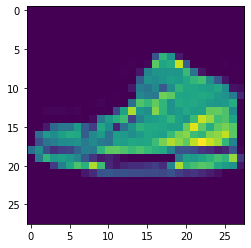

In [43]:
np.random.seed(5)

idx = np.random.randint(low = 0 , high = 59999) #randomly selecting an index

visual_img = X_train_scaled[idx].reshape(28 , 28) #reshaping to visualize the image
plt.imshow(visual_img) #using matplotlib to visualize an image

print('Labels:',labels[y_train_arr[idx]]) #printing the label

## Step 4: Modelling the Neural Network

One important task whenever we are modelling a neural network we need to be sure about the hidden units and type of layer we are going to use.

For this project we are going to utilize the Cnvolutional Neural Network Modelling and are going to follow the below pattern.

1. Conv2D with 32 filters with filter size (3,3), padding = 'SAME' activation = 'relu' and an input shape of (28,28)
2. MaxPooling2D with kernel_size = (2,2)
3. Conv2D with 64 filters with filter size (3,3), activation ='relu'
4. MaxPooling2D with kernel_size =  (3,3)
5. Flatten() layer
6. Two dense layers each with 64 units and activation = 'relu'
7. An output Dense Layer with 10 units and activation = 'relu'

We are not going to use dropout since we are going to keep this model as simple as possible.

In [49]:
#Lets build our model

model = Sequential([
    Conv2D(32 , kernel_size = (3 , 3) ,
           kernel_initializer = 'he_uniform' ,
           bias_initializer = 'zeros' , 
           activation = 'relu', input_shape = (28 , 28 , 1)),
    MaxPooling2D((2,2)),
    Conv2D(64 , kernel_size = (3 , 3) , kernel_initializer = 'he_uniform' ,
           bias_initializer = 'zeros' , 
           activation = 'relu' ),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64 , activation = 'relu'),
    Dense(64 , activation = 'relu'),
    Dense(10 , activation = 'sigmoid')
])

We are all set with our model. Lets check how many paramters are initialized by utilizing the <code>model.summary</code> method.

In [50]:
model.summary() #Checking the summary of the network

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                36928     
_________________________________________________________________
dense_49 (Dense)             (None, 64)              

Its time that we compile our model using the <code>model.compile</code> method

In [51]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) # compiling the model by setting optimizer, loss function , accuracy.

We are all set for training.

For training we use the <code>model.fit</code> method.

In [52]:
#training our model

history = model.fit(X_train_scaled[...,np.newaxis,np.newaxis] , y_train_arr , epochs = 15 , batch_size = 128) 

Epoch 1/15
469/469 [==============================] - 19s 40ms/step - loss: 0.6327 - accuracy: 0.7641
Epoch 2/15
469/469 [==============================] - 19s 40ms/step - loss: 0.3978 - accuracy: 0.8544
Epoch 3/15
469/469 [==============================] - 19s 40ms/step - loss: 0.3528 - accuracy: 0.8710
Epoch 4/15
469/469 [==============================] - 19s 40ms/step - loss: 0.3222 - accuracy: 0.8820
Epoch 5/15
469/469 [==============================] - 19s 40ms/step - loss: 0.3021 - accuracy: 0.8896
Epoch 6/15
469/469 [==============================] - 19s 41ms/step - loss: 0.2784 - accuracy: 0.8973
Epoch 7/15
469/469 [==============================] - 19s 41ms/step - loss: 0.2641 - accuracy: 0.9039
Epoch 8/15
469/469 [==============================] - 19s 41ms/step - loss: 0.2496 - accuracy: 0.9092
Epoch 9/15
469/469 [==============================] - 19s 41ms/step - loss: 0.2357 - accuracy: 0.9136
Epoch 10/15
469/469 [==============================] - 19s 41ms/step - loss: 0.224

Now for checking the loss and accuracy of the training we must form a pandas dataframe of the history.

In [54]:
df = pd.DataFrame(history.history) # creating a dataframe with njumber of epochs for loss and accuracy

df.head() # viewing the first 5 rows

,loss,accuracy
0,0.632686,0.764050
1,0.397812,0.854383
2,0.352825,0.870967
3,0.322242,0.882000
4,0.302079,0.889633


Plotting our loss as well as accuracy.

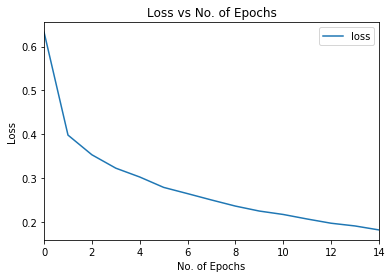

In [61]:
#plotting the Loss vs No. of Epochs graph

df.plot(y = 'loss') 
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Loss vs No. of Epochs')
plt.show()

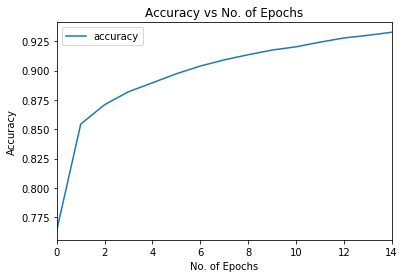

In [62]:
#plotting the Loss vs No. of Epochs graph

df.plot(y = 'accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of Epochs')

plt.show()

We can now evaluate our model using the <code>model.evaluate</code> method.

In [64]:
loss , accuracy = model.evaluate(X_test_scaled[...,np.newaxis] , y_test_arr)

print('Loss is:',loss,'\nAccuracy is:',accuracy) #Checking the test accuracy and loss

313/313 [==============================] - 1s 3ms/step - loss: 0.2572 - accuracy: 0.9089
Loss is: 0.2571842670440674 
Accuracy is: 0.9089000225067139


We are now ready to visualize one of the predictions and check if we are on the right track in predictions using the <code>model.predict</code> method.

The predicted label is: Coat 
The original label is: Coat


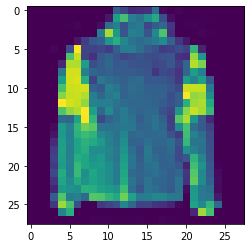

In [80]:
#Checking for a prediction

np.random.seed(33)

idx_test = np.random.randint(low = 0 , high = 9999)
img = X_test_scaled[idx_test]
plt.imshow(img)

pred = model.predict(img.reshape(28 , 28 , 1)[np.newaxis,...])
print('The predicted label is:' , labels[np.argmax(pred)] , '\nThe original label is:',labels[y_test_arr[idx_test]])